Oct. 03-04, 2019

**Write your names in the cell below**

****

You will work with the same **housing data from TP1**. 

<font color='red'> **Files you will need ** </font> 

- File `house_sales_data.csv` : contains the data.
- File `house_sales-README.txt` : contains information about the data variables.
- File `TP3_Feature_engineering.ipynb` : contains source code.

<font color='red'> **What you will do** </font> 

- Follow the instructions below and answer the questions.

- Your answers will generally consist of a mix of code and explanations.

- Feel free to create new cells to write your answers.

- Submit your modified .ipynb file containing your answers to the questions below.

## Summary of data variables

To help you out, below is a summary of all variables and their data types.

       Variable name      dtype        true type      values or range of values

        id                 int64       other          21436 (almost) values
        sale_date         object       unstructured
        zip_code           int64       categorical    {98001, 98002, 98003, 98004, ..., 98188, 98198, 98199} (70 values)
        waterfront         int64       categorical    {0, 1}
        view               int64       categorical    {0, 1, 2, 3, 4}
        floors           float64       discrete       {1.0, 1.5, 2.0, 2.5, 3.0, 3.5}
        bedrooms           int64       discrete       {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33}
        bathrooms        float64       discrete       {0.0, 0.5, 0.75, 1.0, 1.25, 1.5, ..., 7.5, 7.75, 8.0} (30 values)
        condition          int64       discrete       {1, 2, 3, 4, 5}
        grade              int64       discrete       {1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
        yr_built           int64       discrete       {1900, 1901, ..., 2014, 2015}        (116 values)
        yr_renovated       int64       discrete       {0, 1934, 1940, ..., , 2014, 2015}   (70 values)
        sqft_above         int64       continuous
        sqft_living        int64       continuous
        sqft_basement      int64       continuous
        sqft_living15      int64       continuous
        sqft_lot           int64       continuous
        sqft_lot15         int64       continuous
        lat              float64       continuous
        long             float64       continuous
        price              int64       continuous

******

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

## Part 1: Read the Data

Execute the cells below.

In [52]:
# read the data from a file

house_sales_df = pd.read_csv ('./house_sales_data.csv')
house_sales_df.shape

(21613, 21)

In [53]:
# Change the order of columns JUST FOR CLARITY

house_sales_df = house_sales_df[['id', 'sale_date', 'zip_code', 'waterfront', 'view', 
                                 'floors', 'bedrooms', 'bathrooms', 'condition', 'grade', 
                                 'yr_built', 'yr_renovated', 
                                 'sqft_above', 'sqft_living', 'sqft_basement', 'sqft_living15', 'sqft_lot', 'sqft_lot15',
                                 'lat', 'long', 'price']]
house_sales_df.shape

(21613, 21)

In [54]:
house_sales_df.head()

,id,sale_date,zip_code,waterfront,view,floors,bedrooms,bathrooms,condition,grade,...,yr_renovated,sqft_above,sqft_living,sqft_basement,sqft_living15,sqft_lot,sqft_lot15,lat,long,price
0,7129300520,20141013T000000,98178,0,0,1.0,3,1.00,3,7,...,0,1180,1180,0,1340,5650,5650,47.5112,-122.257,221900
1,6414100192,20141209T000000,98125,0,0,2.0,3,2.25,3,7,...,1991,2170,2570,400,1690,7242,7639,47.7210,-122.319,538000
2,5631500400,20150225T000000,98028,0,0,1.0,2,1.00,3,6,...,0,770,770,0,2720,10000,8062,47.7379,-122.233,180000
3,2487200875,20141209T000000,98136,0,0,1.0,4,3.00,5,7,...,0,1050,1960,910,1360,5000,5000,47.5208,-122.393,604000
4,1954400510,20150218T000000,98074,0,0,1.0,3,2.00,3,8,...,0,1680,1680,0,1800,8080,7503,47.6168,-122.045,510000


## Part 2: Feature engineering of _numeric_ attributes

Answer the following questions.

1. create a new data frame called `my_df_numeric` that only contains the 5 variables in the list `numeric_vars_sub` defined below.

2. plot the distribution of these variables using boxplot or histogram. Which of these variables are very skewed (ie. asymmetric)?

3. apply min-max normalization **only on** the non-skewed variables; put the result in a new column in `my_df_numeric` called `<var_name>_scaled`

4. what are the minimum and maximum values of the variables obtained after the previous step? Use the `describe` method ...

5. apply log normalization only on the skewed variables **followed by** the min-max normalization; put the result in a new column in `my_df_numeric` called `<var_name>_log_scaled`.

6. plot the distributions of the 5 new variables that you created in the previous steps. You can use either a boxplot or a histogram. **Hint**: use a `for` loop ...

7. Based on the plots of the previous step, are all these new variables **symmetric** (non-skewed) and do they all have a similar range of values? Explain.

In [55]:
numeric_vars_sub = ['sqft_above', 'sqft_lot', 'lat', 'long', 'price']

In [56]:
my_df_numeric=house_sales_df[numeric_vars_sub]

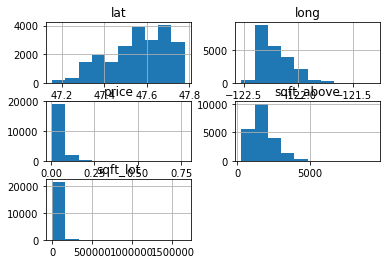

In [57]:
fig=my_df_numeric.hist()


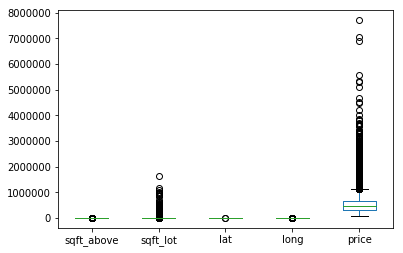

In [58]:
fig=my_df_numeric.plot.box()

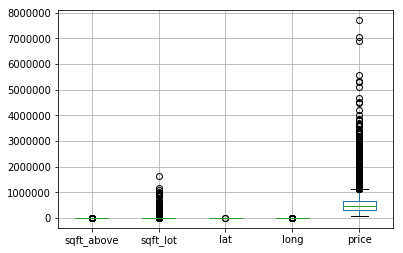

In [59]:
fig=my_df_numeric.boxplot()

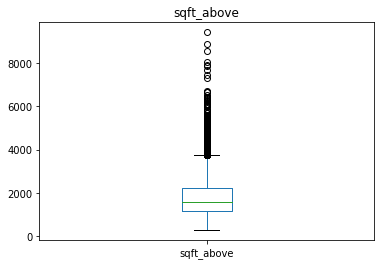

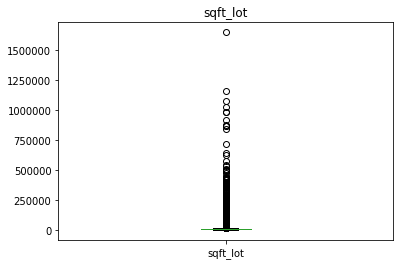

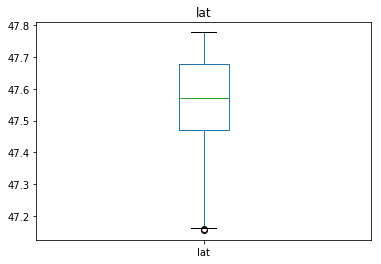

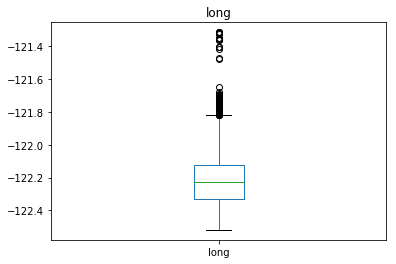

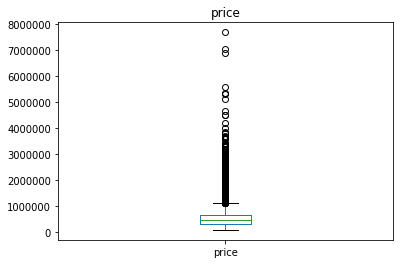

In [60]:
for x in numeric_vars_sub:
    my_df_numeric[x].plot.box()
    plt.title(x)
    plt.show()

In [61]:
non_skewed_vars = ['lat']
skewed_vars = ['sqft_above', 'sqft_lot', 'long', 'price']

In [62]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()

for x in non_skewed_vars:
    x_new = x+'_scaled'
    u = mmsc.fit_transform(my_df_numeric[[x]])  # this returns a 2D array with one column
    print(type(u), u.shape)
    u = u.ravel() # convert to a 1D array
    print(type(u), u.shape)
    my_df_numeric[x_new] = pd.Series(u)

<class 'numpy.ndarray'> (21613, 1)
<class 'numpy.ndarray'> (21613,)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [63]:
my_df_numeric.lat_scaled.describe()

count    21613.000000
mean         0.650076
std          0.222879
min          0.000000
25%          0.506836
50%          0.668972
75%          0.839794
max          1.000000
Name: lat_scaled, dtype: float64

In [64]:
my_df_numeric.lat.describe()

count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [65]:

for x in skewed_vars:
    x_new = x+'_log_scaled'
    if my_df_numeric[x].min() < 0:
        u1 = my_df_numeric[x] - my_df_numeric[x].min() + 1e-6
    else:
        u1 = my_df_numeric[x]
    u = mmsc.fit_transform(pd.DataFrame(np.log(u1))).ravel()
    #print(type(u), u.shape)
    my_df_numeric[x_new] = pd.Series(u)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [66]:

new_numeric_vars = sorted(list(set(my_df_numeric.columns)-set(numeric_vars_sub)))
new_numeric_vars

['lat_scaled',
 'long_log_scaled',
 'price_log_scaled',
 'sqft_above_log_scaled',
 'sqft_lot_log_scaled']

In [67]:
my_df_numeric.head()

,sqft_above,sqft_lot,lat,long,price,lat_scaled,sqft_above_log_scaled,sqft_lot_log_scaled,long_log_scaled,price_log_scaled
0,1180,5650,47.5112,-122.257,221900,0.571498,0.403314,0.295858,0.891076,0.234210
1,2170,7242,47.7210,-122.319,538000,0.908959,0.578392,0.326644,0.871790,0.425429
2,770,10000,47.7379,-122.233,180000,0.936143,0.280635,0.366664,0.897336,0.189025
3,1050,5000,47.5208,-122.393,604000,0.586939,0.369769,0.280700,0.838791,0.450414
4,1680,8080,47.6168,-122.045,510000,0.741354,0.504841,0.340224,0.933420,0.413889


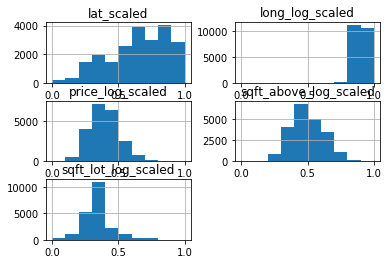

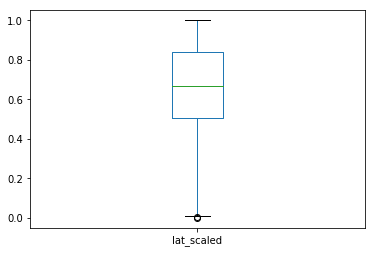

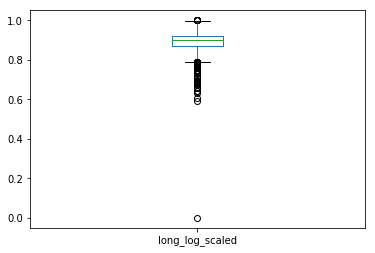

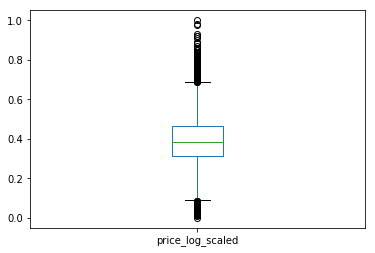

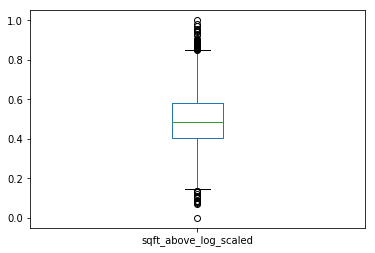

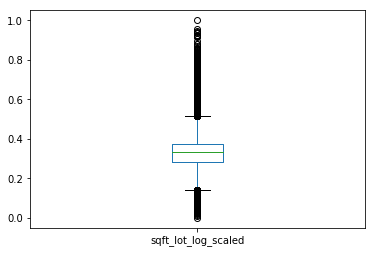

In [68]:
my_df_numeric[new_numeric_vars].hist()
plt.show()
for x in new_numeric_vars:
    my_df_numeric[x].plot.box()
    plt.show()

## Part 3: Feature engineering of _categorical_ attributes

The following questions are about the `view` variable which is *categorical* (see the data summary at the top of this file).

1. What are the two least frequent categories in this variable?  *Hint*: call the `value_counts` method ...

2. Plot the distribution of this variable as a **bar plot**.  *But be careful*: you should first call `value_counts` before calling `plot` ...

3. Combine the two smallest categories into a single category having value 6. Put the result in the same column (that is, do not create a new column). You can verify your result by calling the `value_counts` method again ...

4. Apply **one-hot encoding** on this attribute. Put the result in a new data frame called `view_one_hot_df`.

5. Verify the shape of this new data frame.

6. Verify the contents of this new data frame by calling `describe`.

In [69]:
house_sales_df.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

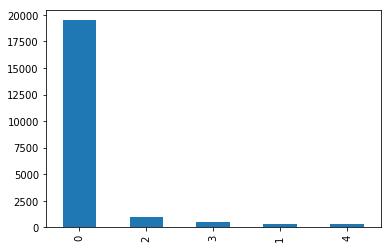

In [70]:
house_sales_df.view.value_counts().plot.bar()

In [71]:
house_sales_df.loc[(house_sales_df['view']==1)|(house_sales_df['view']==4),'view'] = 6

In [75]:
house_sales_df.view.value_counts()

0    19489
2      963
6      651
3      510
Name: view, dtype: int64

In [76]:

view_one_hot_df = pd.get_dummies(house_sales_df.view)

In [77]:
view_one_hot_df.shape

(21613, 4)

In [78]:
view_one_hot_df.describe()

,0,2,3,6
count,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.901726,0.044557,0.023597,0.030121
std,0.297692,0.206333,0.151793,0.170924
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


## Part 4: Converting dates  [BONUS]

Transform the `sale_date` variable into 3 new variables `year`, `month`, `day`. Put the result in a new data frame called `sale_date_df`. *Hint*: you can use regular expressions, but you really don't have to; there is a much simpler method using `split` method.

*****